In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# load meat consumption data
df = pd.read_csv('meat_consumption.csv')
df.head()

,location,indicator,subject,measure,frequency,time,value
0,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1990,0.000004
1,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1991,27.808401
2,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1992,26.278166
3,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1993,26.244478
4,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1994,25.541244


In [3]:
# information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12140 entries, 0 to 12139
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   location   12140 non-null  object 
 1   indicator  12140 non-null  object 
 2   subject    12140 non-null  object 
 3   measure    12140 non-null  object 
 4   frequency  12140 non-null  object 
 5   time       12140 non-null  int64  
 6   value      12140 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 664.0+ KB


In [4]:
# Describes the following aspects of the data: Type of the data (integer, float, Python object, etc.)
df.dtypes

location      object
indicator     object
subject       object
measure       object
frequency     object
time           int64
value        float64
dtype: object

In [5]:
# Finding the shape of the data
df.shape

(12140, 7)

In [6]:
#Length of Data
len(df)

12140

In [7]:
threshold = len(df)*0.05
threshold

607.0

In [8]:
#Checking for missing values
df.isna().sum()

location     0
indicator    0
subject      0
measure      0
frequency    0
time         0
value        0
dtype: int64

In [9]:
#Finding Duplicated value
df.duplicated().sum()

0

In [10]:
# Finding Unique values
df.nunique()

location        39
indicator        1
subject          4
measure          2
frequency        1
time            39
value        11909
dtype: int64

In [11]:
# description of the data in the DataFrame.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
time,12140.0,2009.042175,11.233660,1.990000e+03,1999.000000,2009.000000,2019.000000,2028.000000
value,12140.0,2245.854995,10408.124296,7.505681e-08,5.013586,24.274546,435.598351,140252.569719


In [12]:
#Finding categorical columns in dataset
df.select_dtypes(include='object').columns

Index(['location', 'indicator', 'subject', 'measure', 'frequency'], dtype='object')

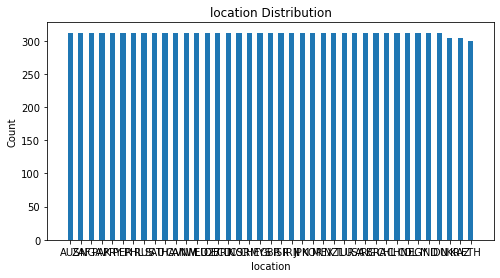

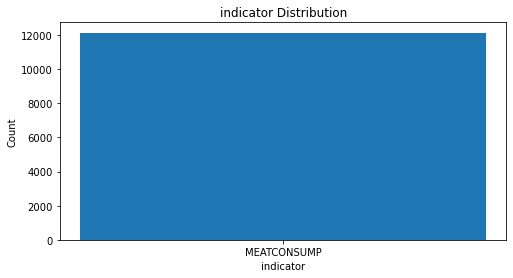

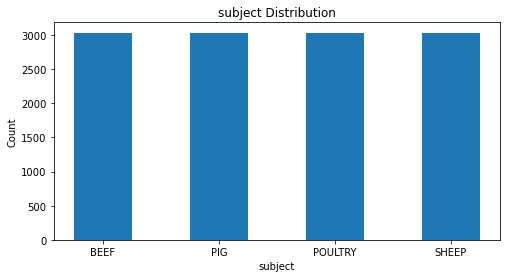

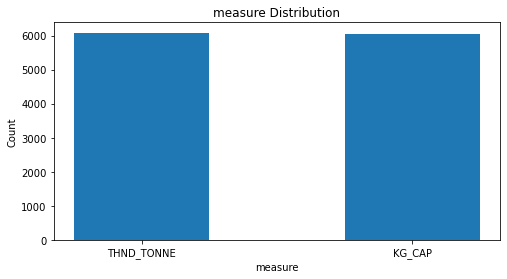

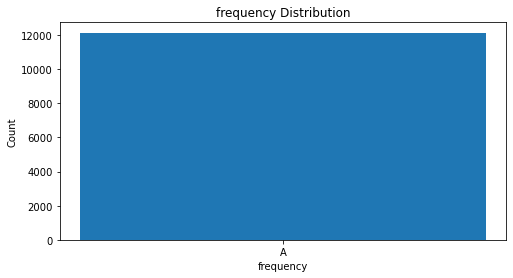

In [13]:
cat_col = df.select_dtypes(include='object').columns
for i, column in enumerate(cat_col):
    counts = df[column].value_counts()
    plt.figure(figsize=(8,4))
    plt.bar(counts.index, counts.values,width=0.5)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title('{} Distribution'.format(column))

In [14]:
#Finding numerical columns in dataset
df.select_dtypes(exclude='object').columns

Index(['time', 'value'], dtype='object')

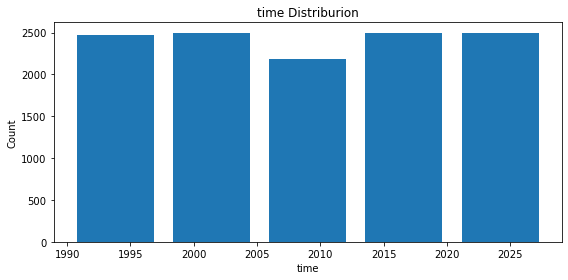

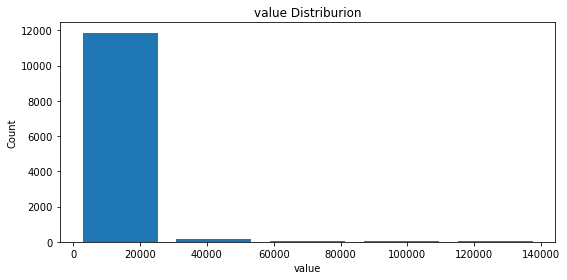

In [15]:
num_col = df.select_dtypes(exclude='object').columns
for i, column in enumerate(num_col):
    plt.figure(figsize=(8,4))
    plt.hist(df[column],bins=5, rwidth=0.8)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title('{} Distriburion'.format(column))
    plt.tight_layout()
    plt.show()

In [16]:
df.select_dtypes('number').head()

,time,value
0,1990,0.000004
1,1991,27.808401
2,1992,26.278166
3,1993,26.244478
4,1994,25.541244


In [17]:
# Finding the correlations in the dataset
df.corr()

,time,value
time,1.000000,0.058304
value,0.058304,1.000000


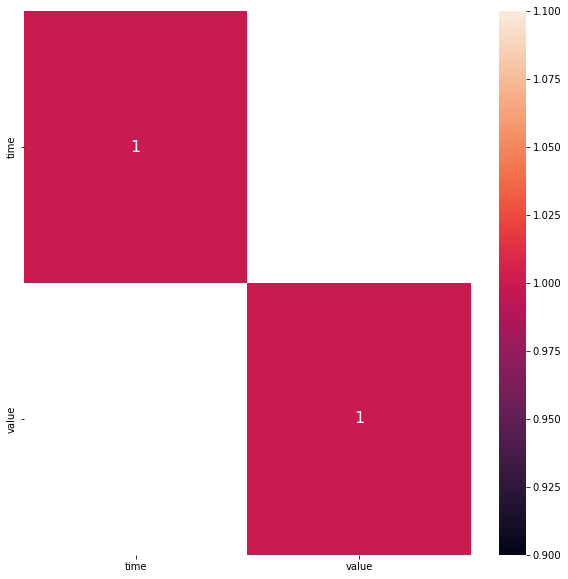

In [18]:
M = df.corr()[df.corr() > .5]
plt.figure(figsize=(10,10))
sns.heatmap(M, annot=True, fmt='.1g', annot_kws={'fontsize':16})

plt.show()

<AxesSubplot:xlabel='time', ylabel='value'>

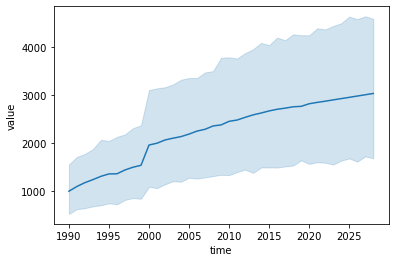

In [19]:
sns.lineplot(data=df, x='time',y='value')

In [20]:
df['measure'].value_counts()

THND_TONNE    6084
KG_CAP        6056
Name: measure, dtype: int64

In [21]:
df['subject'].value_counts()

BEEF       3035
PIG        3035
POULTRY    3035
SHEEP      3035
Name: subject, dtype: int64

<AxesSubplot:xlabel='frequency', ylabel='time'>

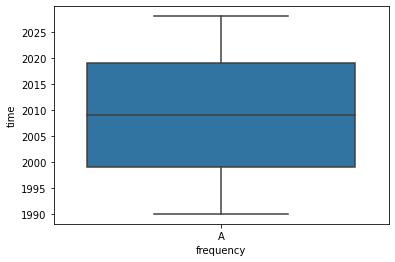

In [22]:
sns.boxplot(data=df, x='frequency',y='time')

In [23]:
# Top 10 countries with the most meat consumption?

In [24]:
df['location'].value_counts()

AUS      312
ZAF      312
NGA      312
PAK      312
PRY      312
PER      312
PHL      312
RUS      312
SAU      312
THA      312
CAN      312
VNM      312
WLD      312
EU27     312
OECD     312
BRICS    312
NOR      312
CHE      312
MYS      312
GBR      312
ISR      312
IRN      312
JPN      312
KOR      312
MEX      312
NZL      312
TUR      312
USA      312
ARG      312
BRA      312
CHL      312
CHN      312
COL      312
EGY      312
IND      312
IDN      312
UKR      304
KAZ      304
ETH      300
Name: location, dtype: int64

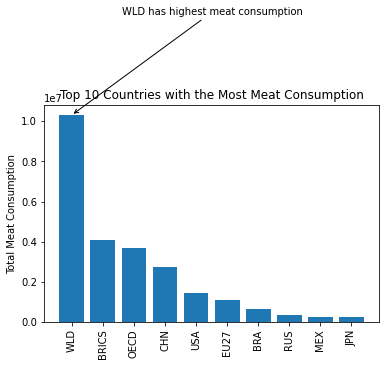

In [25]:
# calculate total meat consumption by country
total_consumption_by_country = df.groupby('location')['value'].sum()

# get country with highest meat consumption
highest_consumption_country = total_consumption_by_country.idxmax()

# get top 10 countries with highest meat consumption
top_consumption_by_country = total_consumption_by_country.nlargest(10)

# create bar plot of total meat consumption by country
plt.bar(top_consumption_by_country.index, top_consumption_by_country)
plt.xticks(rotation=90)
plt.ylabel('Total Meat Consumption')
plt.title('Top 10 Countries with the Most Meat Consumption')
plt.annotate(f'{highest_consumption_country} has highest meat consumption', 
             xy=(top_consumption_by_country.idxmax(), top_consumption_by_country.max()), 
             xytext=(50, 100), 
             textcoords='offset points', 
             arrowprops=dict(arrowstyle='->'))
plt.show()

In [26]:
# What meat type is the most consumed?

# calculate total meat consumption by type
total_consumption_by_type = df.groupby('subject')['value'].sum()

# get meat type with highest consumption
highest_consumption_type = total_consumption_by_type.idxmax()

print(f'{highest_consumption_type} is the most consumed meat type')

PIG is the most consumed meat type


<AxesSubplot:xlabel='subject', ylabel='value'>

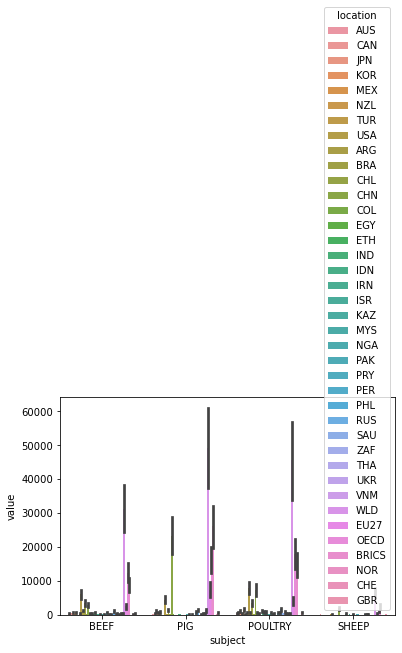

In [27]:
sns.barplot(data=df, x='subject',y='value',hue='location')

In [28]:
# How Much Annual Increment Percentage Occurs every Year for Pork Consumption

# filter data for pork consumption
pork_data = df[df['subject'] == 'PIG']

# calculate annual increment percentage
pork_data['value'] = pork_data['value'].pct_change() * 100

# display results
print(pork_data[['time', 'value', 'value']])

       time         value         value
39     1990           NaN           NaN
40     1991  3.157285e+08  3.157285e+08
41     1992  5.065880e+00  5.065880e+00
42     1993 -1.139749e+00 -1.139749e+00
43     1994  3.747104e+00  3.747104e+00
...     ...           ...           ...
12057  2024 -2.432728e-01 -2.432728e-01
12058  2025 -2.369205e-01 -2.369205e-01
12059  2026 -2.448674e-01 -2.448674e-01
12060  2027 -2.482284e-01 -2.482284e-01
12061  2028 -2.313965e-01 -2.313965e-01

[3035 rows x 3 columns]


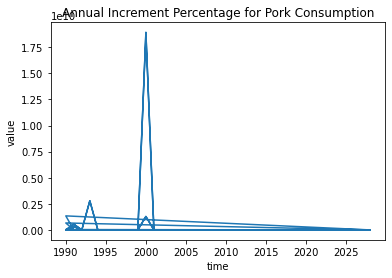

In [29]:
# filter data for pork consumption
pork_data = df[df['subject'] == 'PIG']

# calculate annual increment percentage
pork_data['value'] = pork_data['value'].pct_change() * 100

# plot the data
plt.plot(pork_data['time'], pork_data['value'])
plt.xlabel('time')
plt.ylabel('value')
plt.title('Annual Increment Percentage for Pork Consumption')
plt.show()

In [30]:
# In what year was Meat consumption the highest

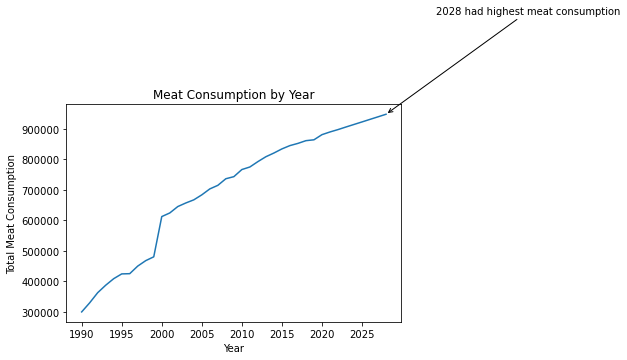

In [31]:
# calculate total meat consumption by year
total_consumption_by_year = df.groupby('time')['value'].sum()

# get year with highest meat consumption
highest_consumption_year = total_consumption_by_year.idxmax()

# create line plot of total meat consumption by year
plt.plot(total_consumption_by_year.index, total_consumption_by_year)
plt.xlabel('Year')
plt.ylabel('Total Meat Consumption')
plt.title('Meat Consumption by Year')
plt.annotate(f'{highest_consumption_year} had highest meat consumption', 
             xy=(highest_consumption_year, total_consumption_by_year.max()), 
             xytext=(50, 100), 
             textcoords='offset points', 
             arrowprops=dict(arrowstyle='->'))
plt.show()

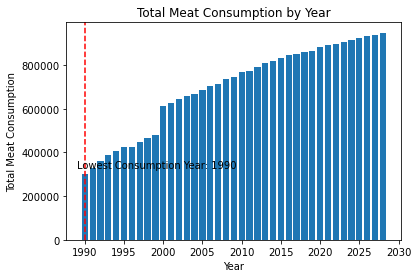

In [32]:
# What year had the lowest consumption of meat?
# calculate total meat consumption by year
total_consumption_by_year = df.groupby('time')['value'].sum()

# get year with lowest consumption
lowest_consumption_year = total_consumption_by_year.idxmin()

# plot the data
plt.bar(total_consumption_by_year.index, total_consumption_by_year)
plt.xlabel('Year')
plt.ylabel('Total Meat Consumption')
plt.title('Total Meat Consumption by Year')
plt.axvline(x=lowest_consumption_year, color='r', linestyle='--')
plt.text(lowest_consumption_year-1, 1.1*total_consumption_by_year.min(), f'Lowest Consumption Year: {lowest_consumption_year}', fontsize=10)
plt.show()

In [33]:
# What type of meat is consumed in Nigeria?

In [34]:
# filter data for Nigeria
nigeria_data = df[df['location'] == 'NGA']

# calculate total meat consumption by type
total_consumption_by_type = nigeria_data.groupby('subject')['value'].sum()

# get meat type with highest consumption
highest_consumption_type = total_consumption_by_type.idxmax()

print(f'{highest_consumption_type} is mostly consumed in Nigeria')

SHEEP is mostly consumed in Nigeria


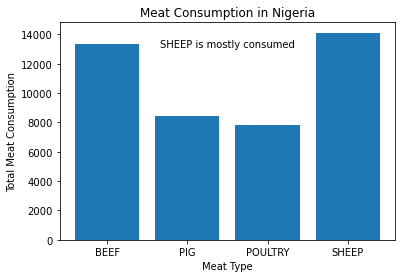

In [35]:
# filter data for Nigeria
nigeria_data = df[df['location'] == 'NGA']

# calculate total meat consumption by type
total_consumption_by_type = nigeria_data.groupby('subject')['value'].sum()

# get meat type with highest consumption
highest_consumption_type = total_consumption_by_type.idxmax()

# create bar plot of meat consumption by type
plt.bar(total_consumption_by_type.index, total_consumption_by_type)
plt.xlabel('Meat Type')
plt.ylabel('Total Meat Consumption')
plt.title('Meat Consumption in Nigeria')
plt.annotate(f'{highest_consumption_type} is mostly consumed', 
             xy=(highest_consumption_type, total_consumption_by_type.max()), 
             xytext=(0.5, 0.9), 
             textcoords='axes fraction', 
             ha='center', 
             va='center')
plt.show()

In [36]:
# State total Meat Consumption in Nigeria in 2023

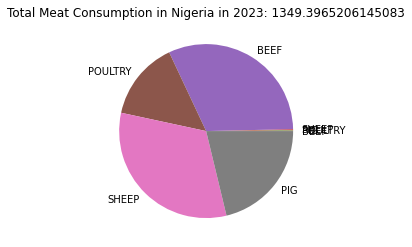

In [37]:

# filter data for Nigeria and 2023
nigeria_2023_data = df[(df['location'] == 'NGA') & (df['time'] == 2023)]

# calculate total meat consumption in 2023
total_consumption = nigeria_2023_data['value'].sum()

# create pie chart of meat consumption by type
plt.pie(nigeria_2023_data['value'], labels=nigeria_2023_data['subject'])
plt.title(f'Total Meat Consumption in Nigeria in 2023: {total_consumption}')
plt.show()